In [3]:
input_file = '../graph/bitcoin-undirected.edgelist'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [6]:
df = pd.read_csv(input_file, sep=' ', header=0)
df.columns = ['from', 'to']

In [4]:
# Get all transactions a node is involved in
def get_number_of_trans(df, node):
    return df[(df['X'] == node) | (df['Y'] == node)].shape[0]

counts = {'Id': [], 'Count': []}
nodes = np.sort(pd.concat([df['X'], df['Y']]).unique())
for node in nodes:
    counts['Id'].append(node)
    counts['Count'].append(get_number_of_trans(df, node))
counts_df = pd.DataFrame(counts)
counts_df.set_index('Id', inplace=True)

In [5]:
np.mean(counts['Count'])

7.30862098282605

In [6]:
np.median(counts['Count'])

2.0

Plot distribution of node degrees (number of neighbors per node)

In [7]:
# Define available embeddings
emb_filenames = [
             '../emb/bitcoin-2dims-10walks-80length.emb',
             '../emb/bitcoin-2dims-20walks-80length.emb',
             '../emb/bitcoin-2dims-40walks-80length.emb',
             '../emb/bitcoin-2dims-80walks-80length.emb']

# Load embeddings
embeddings = []
for filename in emb_filenames:
    embedding = pd.read_csv(filename, sep=' ', header=0)
    embedding.index.rename('Id', inplace=True)
    embedding.columns = ['X', 'Y']
    embeddings.append(embedding)

In [57]:
# Rename and join
dfs_joined = []
for df in embeddings:
    df_joined = df.join(counts_df)
    df_joined.sort_values(by=['Count'], inplace=True)
    dfs_joined.append(df_joined)

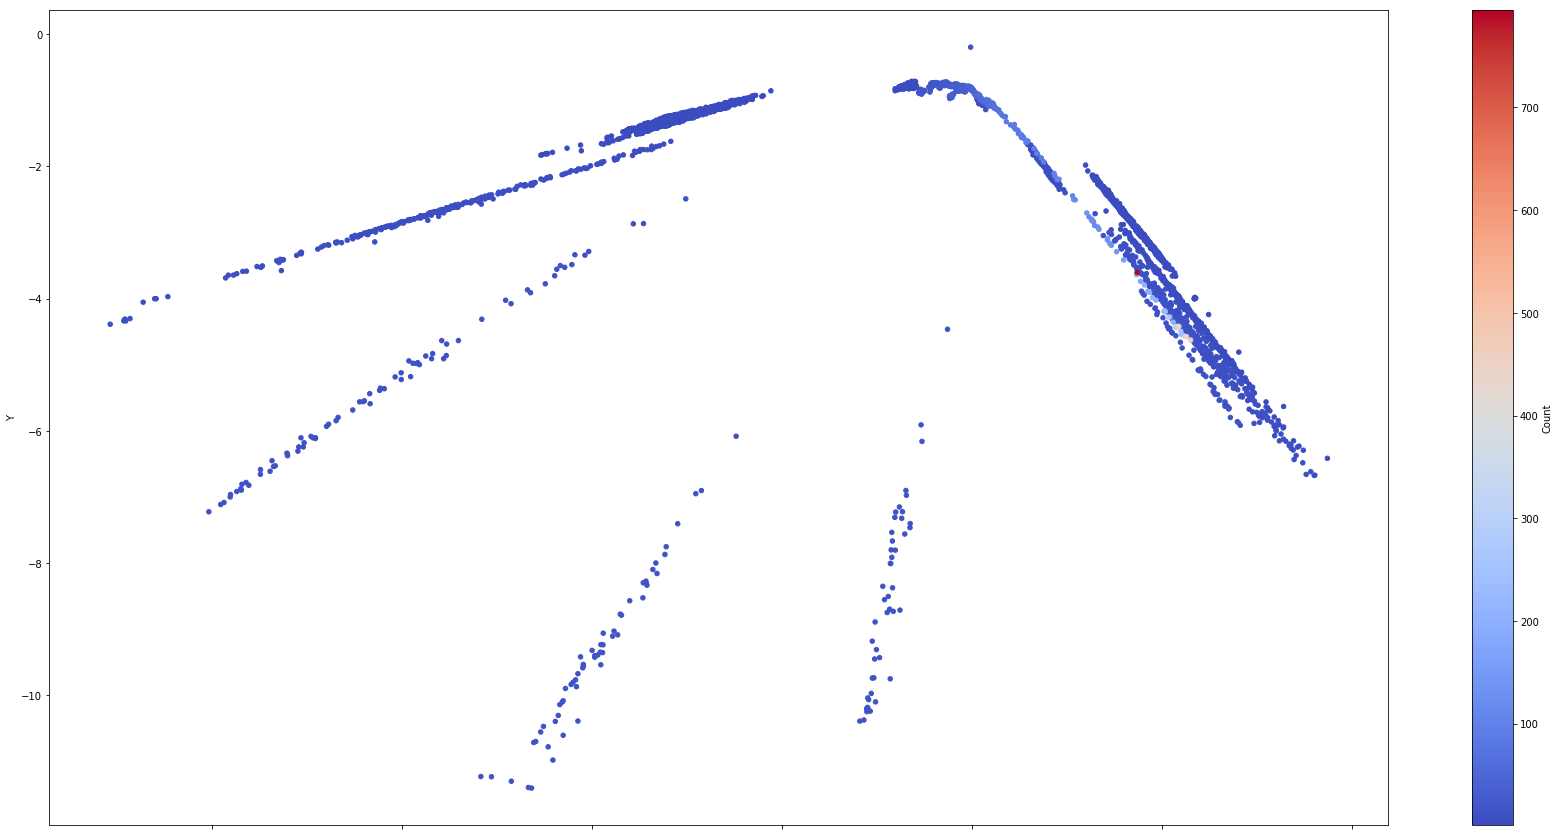

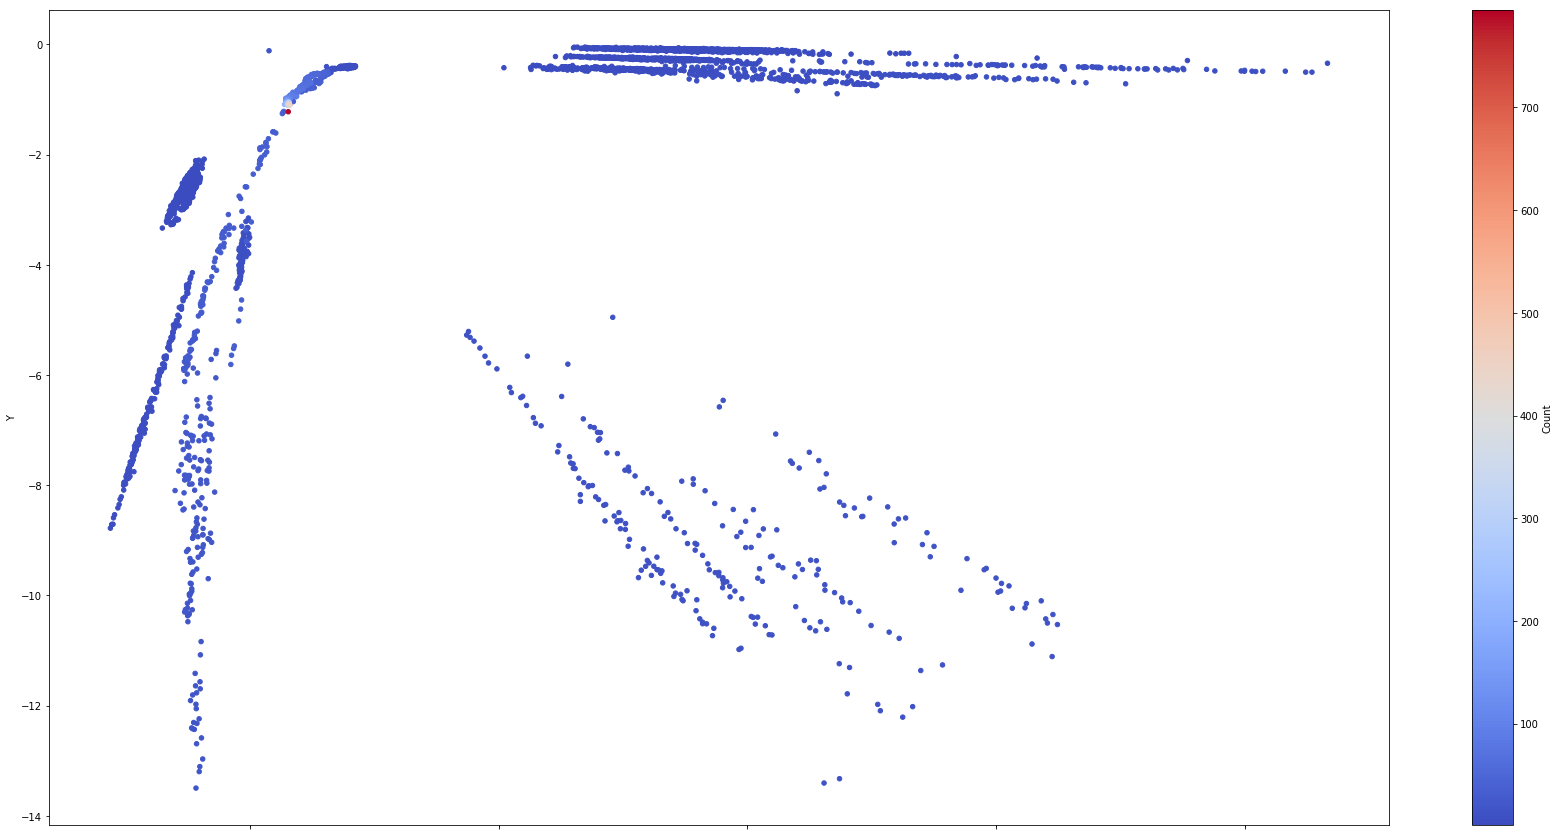

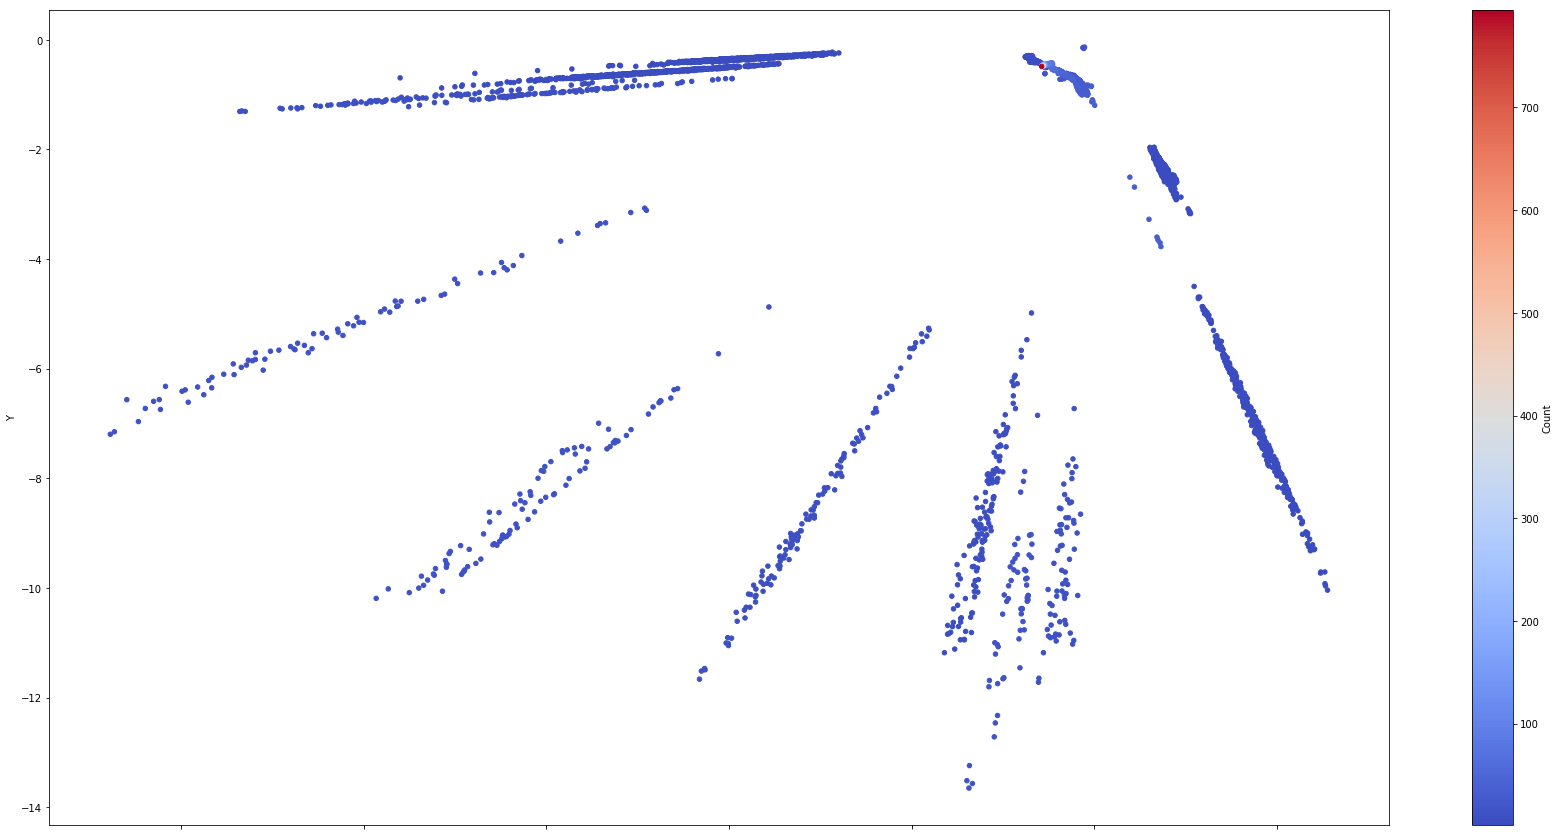

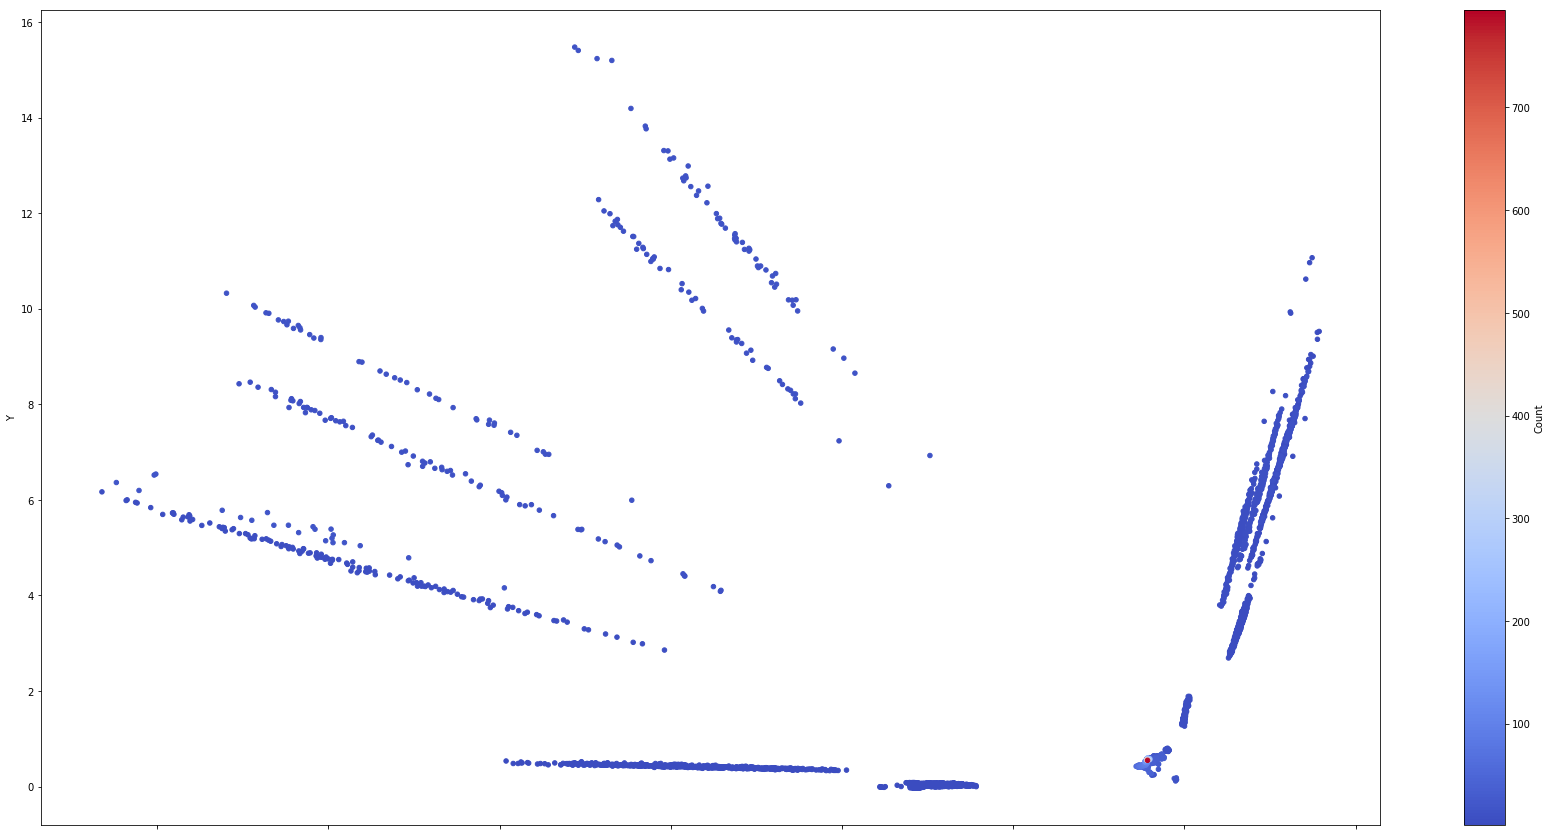

In [61]:
# Check out the in- out- degrees DO THIS FIRST
# Attempt T-SNE, with strength of connections and without!
# Check out weighted random walks
# Sum-weights 
# Choose coloring scheme that does not wrap around
# Variational auto-encoder
# all with and without weights

for df in dfs_joined:
    min_count = 0
    max_count = df['Count'].max()
    df_plot = df[(df['Count'] >= min_count) & (df['Count'] <= max_count)]
    #df.plot.xlim = (-10, 5)
    #df.plot.ylim = (-10, 0)
    df_plot.plot.scatter(x='X', y='Y', c='Count', cmap='coolwarm', figsize = (30,15))